# 540.432 PK: Week 8 (Drug Formulation)
Team Members: *Alejandro Soto Franco, Callie Jones, Daniel Labbe, and Samuel Bernstein*

This week, we are tasked with explaining the effects of crystal size, excipients, disintegrants, time release capsules, enteric delivery, and any other important aspects of drug formulation.

## 8A: Polyethylene glycol (PEG) nanoencapsulation
To compare the pharmacokinetics of a drug administered intravenously with and without a PEG nanoparticle encapsulation, we recall that nanoparticle encapsulation can lead to changes in distribution and elimination kinetics, often reducing the clearance rate and thus prolonging the drug's presence in the system (increased half-life).

We'll assume that PEG encapsulation leads to a decrease in the elimination rate constant $k_{el}$ due to reduced renal clearance or slower metabolism, thus increasing the half-life of the drug. For simplicity, we'll use the same initial dosage and volume of distribution for both scenarios and will just vary $k_{el}$ to reflect the changed pharmacokinetics. In this example, we assume an arbitrary 200mg dose given intravenously.

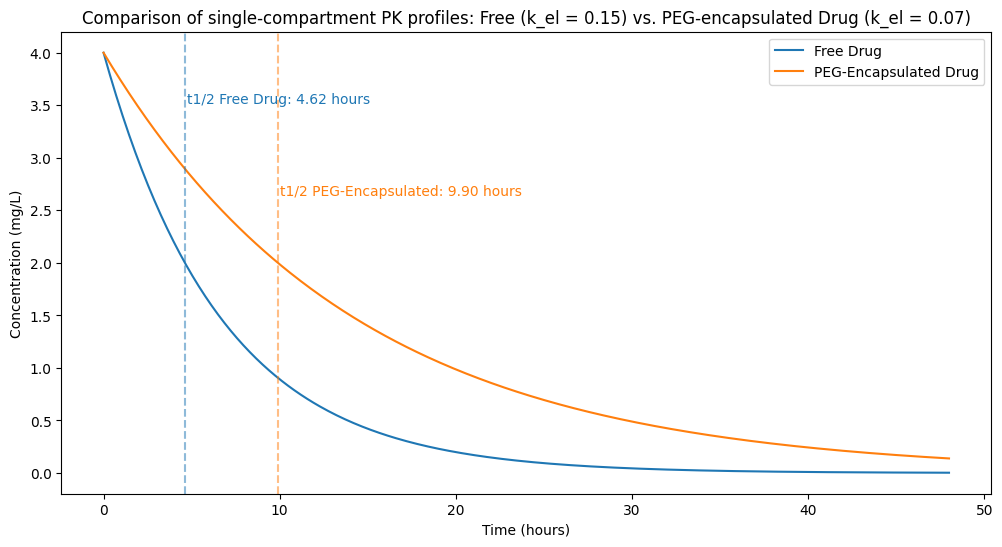

In [7]:
## ASFPKD 8A: PEG nanoencapsulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define PK parameters
Dose = 200  # mg, same dose for both scenarios
Vd = 50  # L, volume of distribution, same for both scenarios

# Elimination rate constants for free and PEG-encapsulated drug
kel_free = 0.15  # 1/h, faster elimination for free drug
kel_encapsulated = 0.07  # 1/h, slower elimination for PEG-encapsulated drug

# Calculate half-lives
t_half_free = np.log(2) / kel_free  # hours
t_half_encapsulated = np.log(2) / kel_encapsulated  # hours

# Initial concentrations (100% bioavailability for IV)
C0 = Dose / Vd  # initial concentration, same for both scenarios

# Model function
def pk_model(C, t, kel):
    dCdt = -kel * C
    return dCdt

# Time points (hours)
t = np.linspace(0, 48, 400)  # simulate for 48 hours

# Solve ODE for each scenario
conc_free = odeint(pk_model, C0, t, args=(kel_free,))
conc_encapsulated = odeint(pk_model, C0, t, args=(kel_encapsulated,))

# Create plot
plt.figure(figsize=(12, 6))
line_free, = plt.plot(t, conc_free, label='Free Drug')
line_encapsulated, = plt.plot(t, conc_encapsulated, label='PEG-Encapsulated Drug')

# Colors for each line
colors = {'Free Drug': line_free.get_color(), 'PEG-Encapsulated Drug': line_encapsulated.get_color()}

# Draw dashed lines for half-lives and add labels
y_max = max(conc_free.max(), conc_encapsulated.max())
y_text_start = y_max + 0.1 * y_max  # starting y-coordinate for text labels, above the highest concentration

# Positions for labels, adjusted to avoid overlap
positions = [0.8, 0.6]  # relative positions for the labels

for (half_life, label, color), position in zip([(t_half_free, 't1/2 Free Drug: {:.2f} hours'.format(t_half_free), colors['Free Drug']),
                                                (t_half_encapsulated, 't1/2 PEG-Encapsulated: {:.2f} hours'.format(t_half_encapsulated), colors['PEG-Encapsulated Drug'])],
                                               positions):
    plt.axvline(x=half_life, color=color, linestyle='--', alpha=0.5)
    plt.text(half_life + 0.1, y_text_start * position, label, color=color)  # adjusted y-coordinate

plt.title('Comparison of single-compartment PK profiles: Free (k_el = 0.15) vs. PEG-encapsulated Drug (k_el = 0.07)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.legend()
plt.show()


## 8B: Varying crystal size
To show an example of how varying crystal size affects PK models, we consider a single-compartment model whose influx is controlled by a variable crystal absorption rate constant and efflux by a constant elimination rate constant. These values are hypothetical but are correctly related to each other based on clinical pharmacology textbooks. We assume $V_C = 5$ L, a 500mg oral dose with a bioavailability of 20%, and a large crystal absorption rate constant that is double for that of small crystals of a particular drug.


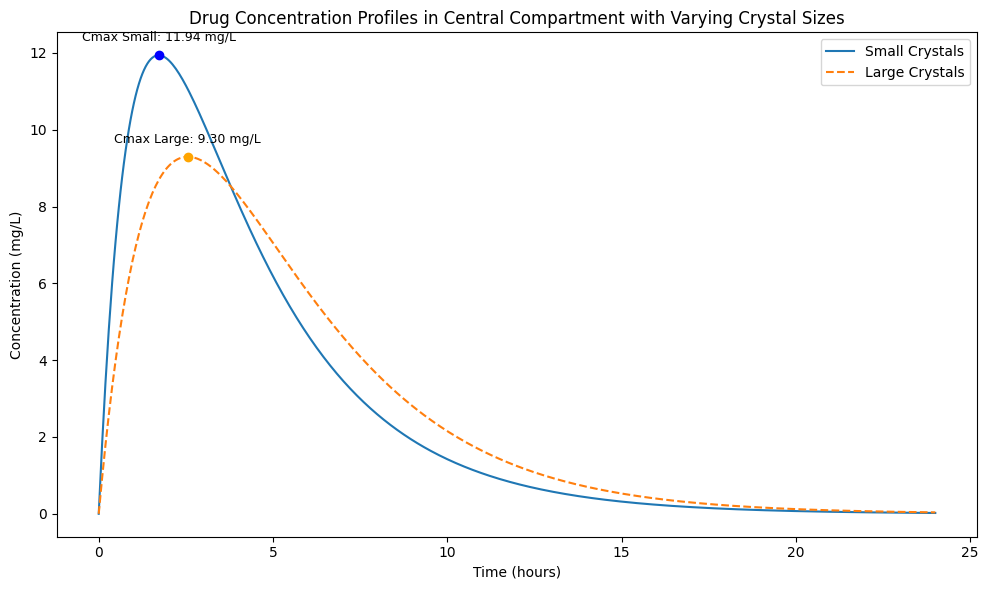

In [27]:
## ASFPKD 8B: Varying crystal size
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the parameters
V_central = 5.0     # Volume of central compartment in L
Dose = 100.0        # Dose of drug in mg
k_abs_small = 1.0   # Absorption rate constant for small crystals in 1/h
k_abs_large = 0.5   # Absorption rate constant for large crystals in 1/h
k_elim = 1.5       # Elimination rate constant in 1/h

# Define the single-compartment model
def single_compartment_model(y, t, k_abs, k_elim, V_central):
    C_GI, C_central = y
    dC_GI_dt = -k_abs * C_GI
    dC_central_dt = (k_abs * C_GI - k_elim * C_central) / V_central
    return [dC_GI_dt, dC_central_dt]

# Initial conditions
y0 = [Dose, 0]  # Initial dose in the GI compartment, none in central compartment

# Time grid for simulation
time = np.linspace(0, 24, 500)

# Solve the ODE for small crystals
params_small = (k_abs_small, k_elim, V_central)
solution_small_crystals = odeint(single_compartment_model, y0, time, args=params_small)

# Solve the ODE for large crystals
params_large = (k_abs_large, k_elim, V_central)
solution_large_crystals = odeint(single_compartment_model, y0, time, args=params_large)

# Extract concentrations for plotting
C_central_small = solution_small_crystals[:, 1]  # Concentrations in central compartment for small crystals
C_central_large = solution_large_crystals[:, 1]  # Concentrations in central compartment for large crystals

# Calculate half-lives and Cmax
t_half_small = np.log(2) / k_elim
t_half_large = np.log(2) / k_elim  # Same k_elim used, so half-life will be the same
Cmax_small = np.max(C_central_small)
tmax_small = time[np.argmax(C_central_small)]
Cmax_large = np.max(C_central_large)
tmax_large = time[np.argmax(C_central_large)]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, C_central_small, label='Small Crystals')
plt.plot(time, C_central_large, label='Large Crystals', linestyle='--')

# Mark the points for Cmax
plt.plot(tmax_small, Cmax_small, 'o', color='blue')
plt.annotate(f'Cmax Small: {Cmax_small:.2f} mg/L', (tmax_small, Cmax_small), textcoords="offset points",
             xytext=(0,10), ha='center', fontsize=9)

plt.plot(tmax_large, Cmax_large, 'o', color='orange')
plt.annotate(f'Cmax Large: {Cmax_large:.2f} mg/L', (tmax_large, Cmax_large), textcoords="offset points",
             xytext=(0,10), ha='center', fontsize=9)

plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('Drug Concentration Profiles in Central Compartment with Varying Crystal Sizes')
plt.legend()
plt.tight_layout()
plt.show()